# 1. Import bibliotek

In [55]:
import os
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/datasets')

# 2. Przygotowanie danych

In [4]:
train = pd.read_csv('DSP_6.csv', sep=',')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.1 Brakujące dane

In [6]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<Axes: >

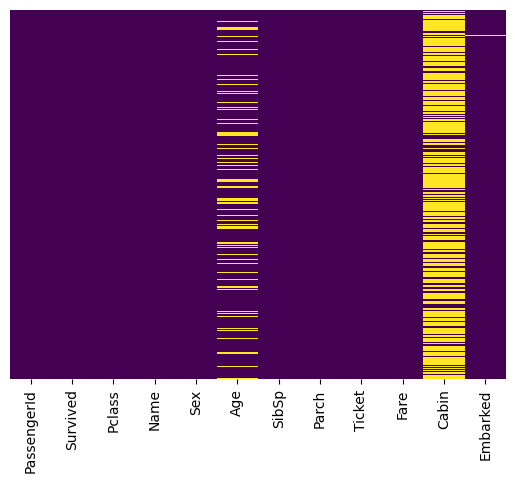

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
train.fillna(train.mean(numeric_only=True), inplace=True)

In [9]:
train = train.drop(columns=['Cabin'])

<Axes: >

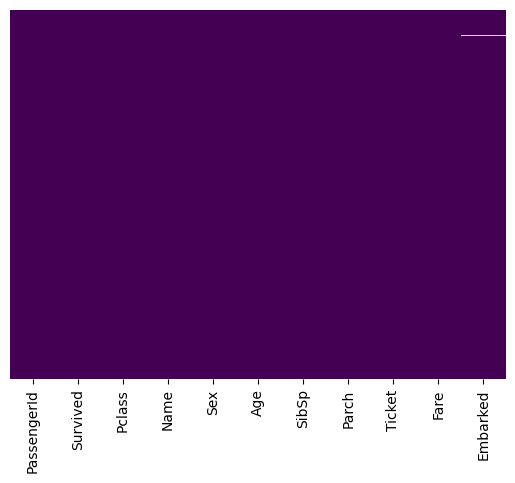

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
train.dropna(inplace=True)

<Axes: >

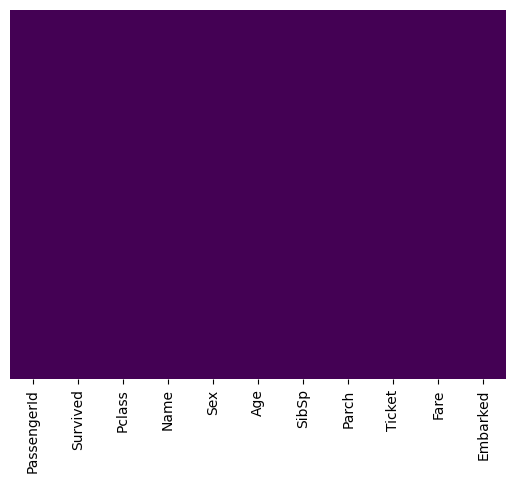

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

# 2.2 Eksploracja danych

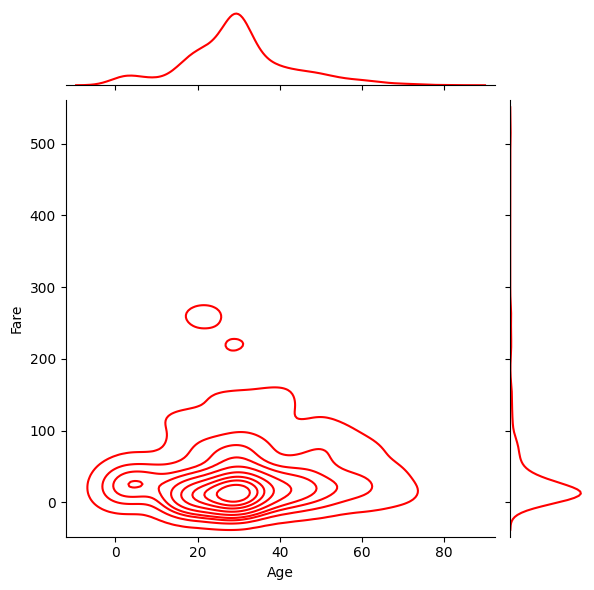

In [14]:
sns.jointplot(x='Age', y='Fare', data=train, color='red', kind='kde')

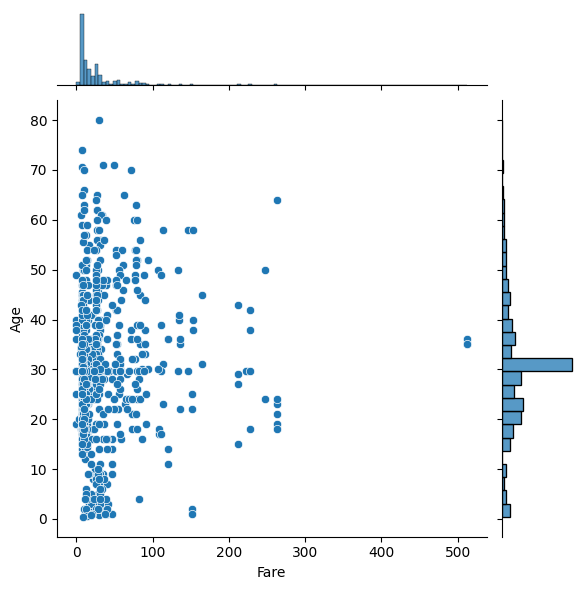

In [15]:
sns.jointplot(x='Fare', y='Age', data=train)

<Axes: xlabel='Survived', ylabel='count'>

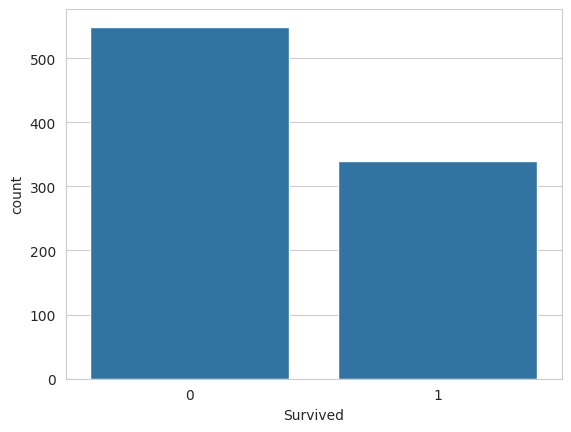

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

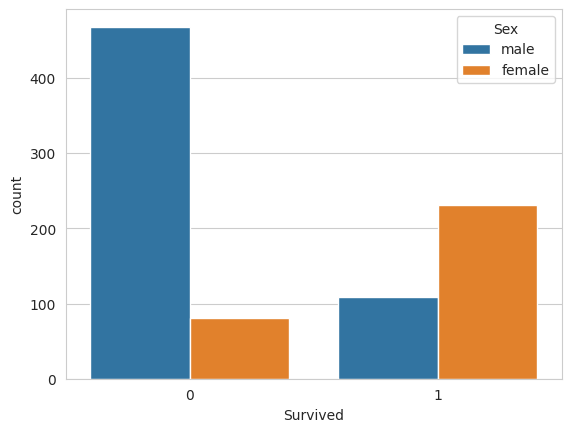

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

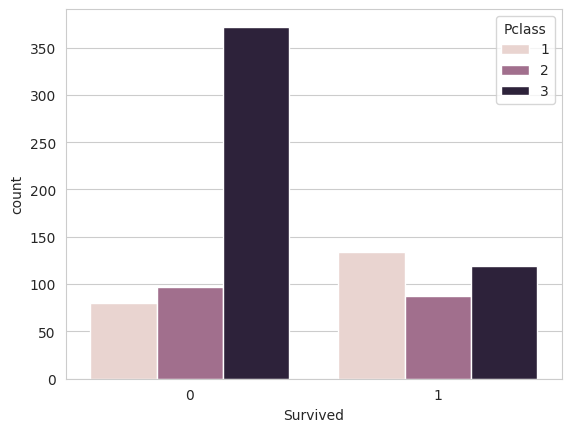

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Pclass')

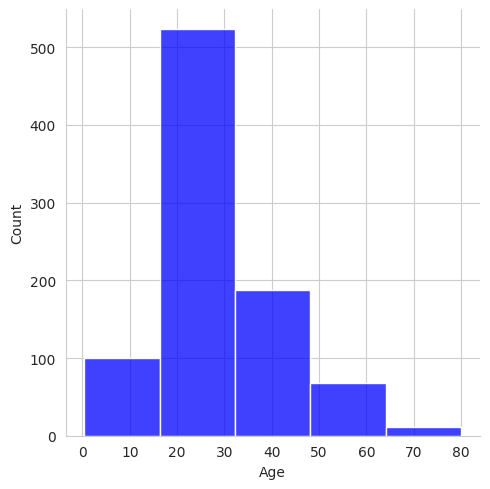

In [19]:
sns.displot(train['Age'], kde=False, color='blue', bins=5)

<Axes: xlabel='Pclass', ylabel='Age'>

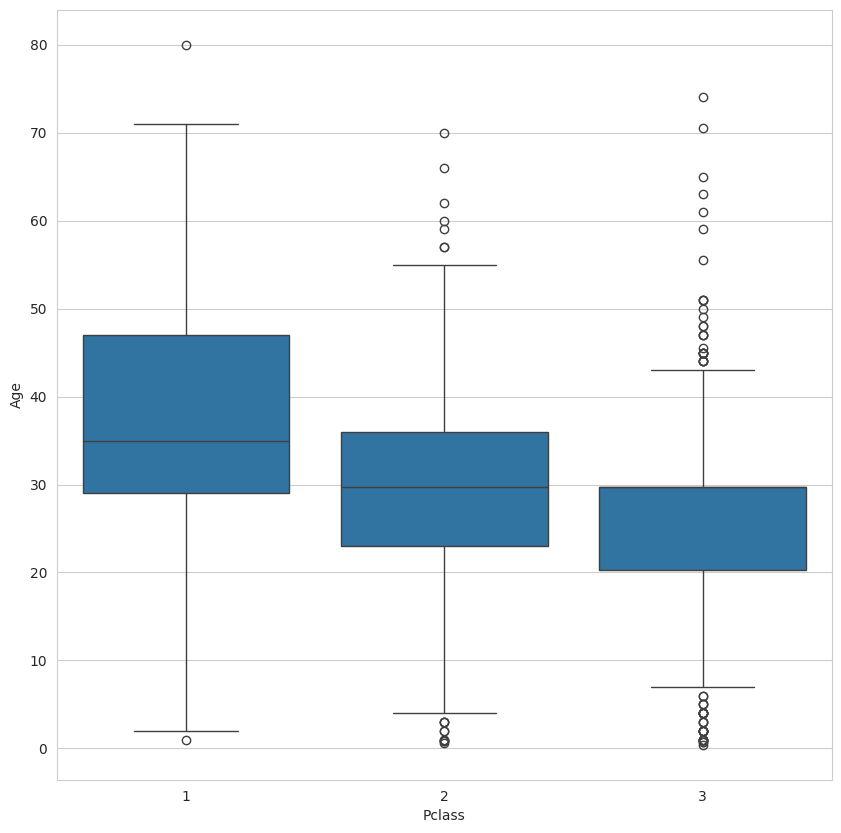

In [20]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Age', data=train)

# 2.3 Konwersja zmiennych do modelu regresji

In [21]:
sex = pd.get_dummies(train['Sex'], drop_first=True, dtype='int')
embark = pd.get_dummies(train["Embarked"], drop_first=True, dtype="int")

In [22]:
train = pd.concat([train, sex, embark], axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [24]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [25]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# 3. Trenowanie modeli

In [26]:
X = train.drop(["Survived"], axis=1)
y = train["Survived"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [45]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print(f'Las: {forest.score(X_train, y_train)}')

lreg = LogisticRegression(max_iter=500)
lreg.fit(X_train, y_train)
print(f'Regresja logistyczna: {lreg.score(X_train, y_train)}')

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f'Drzewa decyzyjne: {tree.score(X_train, y_train)}')

train_models()

Las: 0.98375
Regresja logistyczna: 0.80375
Drzewa decyzyjne: 0.98375
Las: 0.98375
Regresja logistyczna: 0.80375
Drzewa decyzyjne: 0.98375


(RandomForestClassifier(),
 LogisticRegression(max_iter=500),
 DecisionTreeClassifier())

In [48]:
y1_predict = forest.predict(X_test)
print(f'Random forest {accuracy_score(y_test, y1_predict)}')

Random forest 0.8202247191011236


In [49]:
print('Ocena modelu 1. Las')
print(classification_report(y_test, y1_predict))

Ocena modelu 1. Las
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        57
           1       0.75      0.75      0.75        32

    accuracy                           0.82        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.82      0.82      0.82        89



In [50]:
y2_predict = lreg.predict(X_test)
print(f'Logistic regression {accuracy_score(y_test, y2_predict)}')

Logistic regression 0.8539325842696629


In [51]:
print('Ocena modelu 2. Regresja logistyczna')
print(classification_report(y_test, y2_predict))

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.83      0.75      0.79        32

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



In [52]:
y3_predict = tree.predict(X_test)
print(f'Tree {accuracy_score(y_test, y3_predict)}')

Tree 0.8089887640449438


In [54]:
print('Ocena modelu 3. Drzewa')
print(classification_report(y_test, y3_predict))

Ocena modelu 3. Drzewa
              precision    recall  f1-score   support

           0       0.87      0.82      0.85        57
           1       0.71      0.78      0.75        32

    accuracy                           0.81        89
   macro avg       0.79      0.80      0.80        89
weighted avg       0.81      0.81      0.81        89



In [ ]:
predictions = lreg.predict(X_test)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.83      0.75      0.79        32

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



In [30]:
confusion_matrix(y_test, predictions)

array([[52,  5],
       [ 8, 24]])

# 4. Eksport modelu

In [57]:
filename = "model2.hb"
pickle.dump(lreg, open(filename, "wb"))

# Zadanie 1

In [31]:
# Ładowanie danych
df_1 = pd.read_csv("DSP_6.csv", sep=',')

In [ ]:
print('Liczba brakujących rekordów w poszczególnych kolumnach: \n')
print(df_1.isnull().sum())

Liczba brakujących rekordów w poszczególnych kolumnach: 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64


# Zadanie 2

# 2.1 Przygotowanie danych

In [ ]:
# Ładowanie danych
df_2 = pd.read_csv("DSP_6.csv", sep=',')

# 2.2 Dodanie wykresów

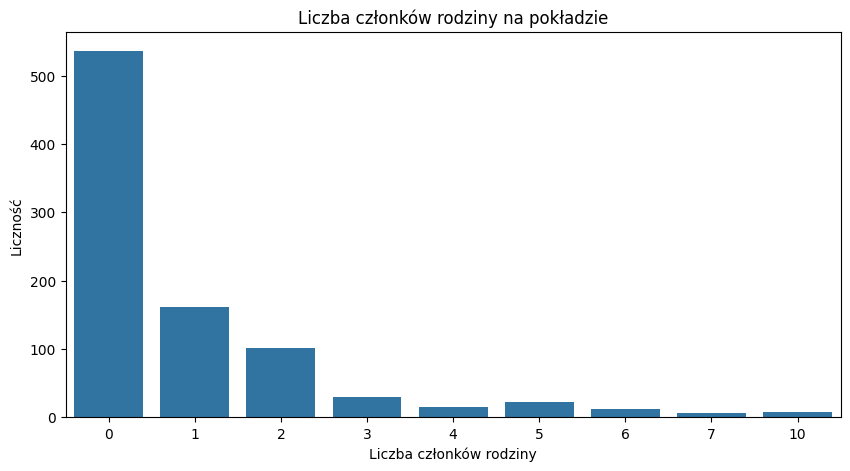

In [ ]:
# Nowa zmienna FamilySize, która przedstawia, ile bliskich miał przy sobie każdy z pasażerów
df_2['FamilySize'] = df_2['SibSp'] + df_2['Parch']

# Ustawienie rozmiaru wykresu
# Na wykresie będzie przedstawionych wiele możliwych liczności (od 0 do 10)
# Szerokość wykresu musi być spora
plt.figure(figsize=(10, 5))

# Wykres liczby członków rodziny na pokładzie
sns.countplot(data=df_2, x='FamilySize')
plt.title('Liczba członków rodziny na pokładzie')
plt.xlabel('Liczba członków rodziny')
plt.ylabel('Liczność')
plt.show()

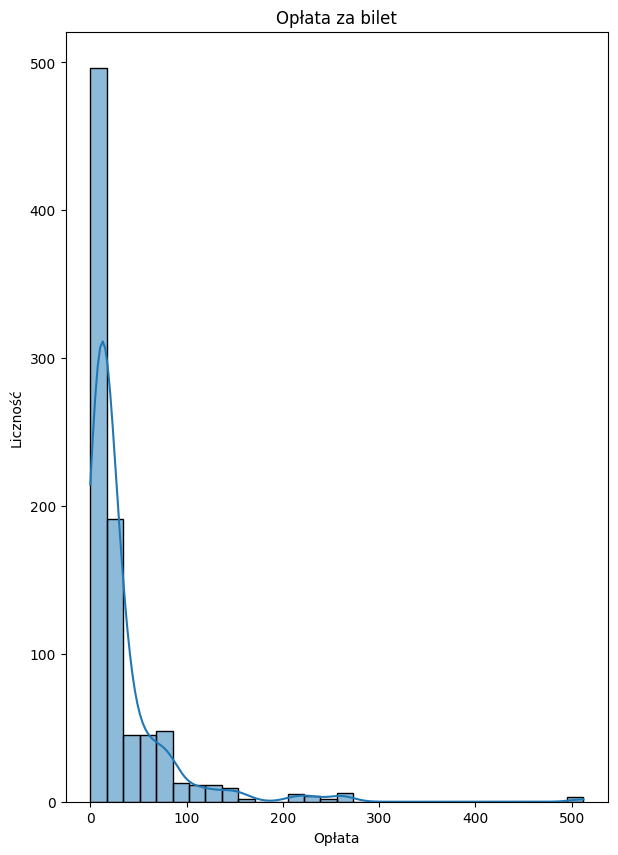

In [ ]:
# Ustawienie rozmiaru wykresu - tym razem powinien być bardziej pionowy
plt.figure(figsize=(7, 10))

# Wykres przedstawiający opłatę za bilety
sns.histplot(data=df_2, x='Fare', bins=30, kde=True)
plt.title('Opłata za bilet')
plt.xlabel('Opłata')
plt.ylabel('Liczność')
plt.show()

# Zadanie 3


# 3.1 Przygotowanie danych

In [ ]:
# Ładowanie danych
df_3 = pd.read_csv("DSP_6.csv", sep=',')

# 3.1.1 Eksploracyjna analiza danych

<Axes: xlabel='Fare'>

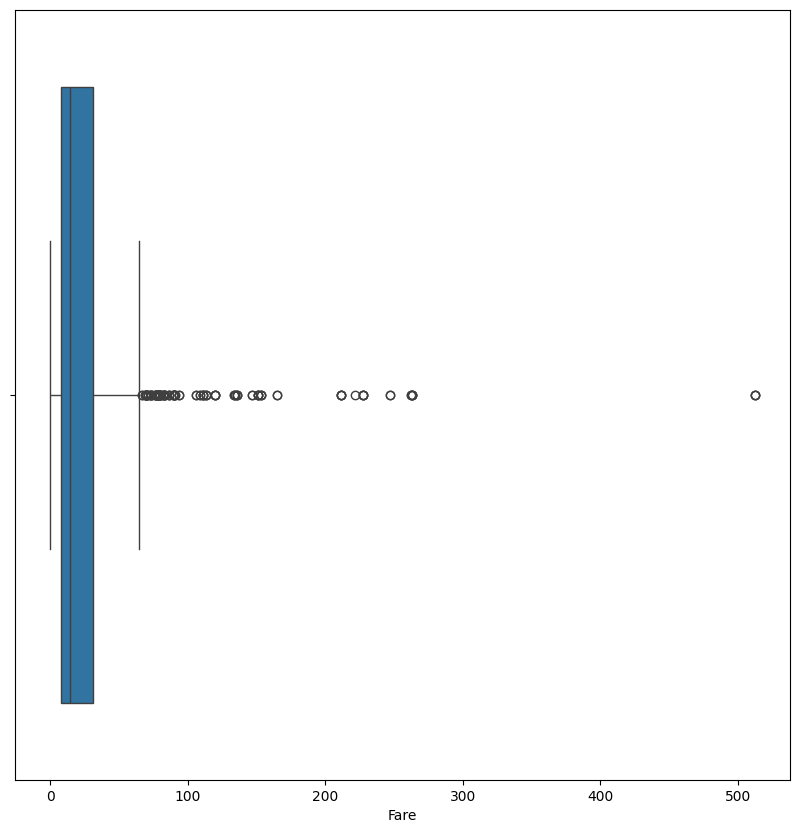

In [ ]:
# Wykres pudełkowy dla zmiennej Fare
plt.figure(figsize=(10, 10))
sns.boxplot(x='Fare', data=df_3)

<Axes: xlabel='Age'>

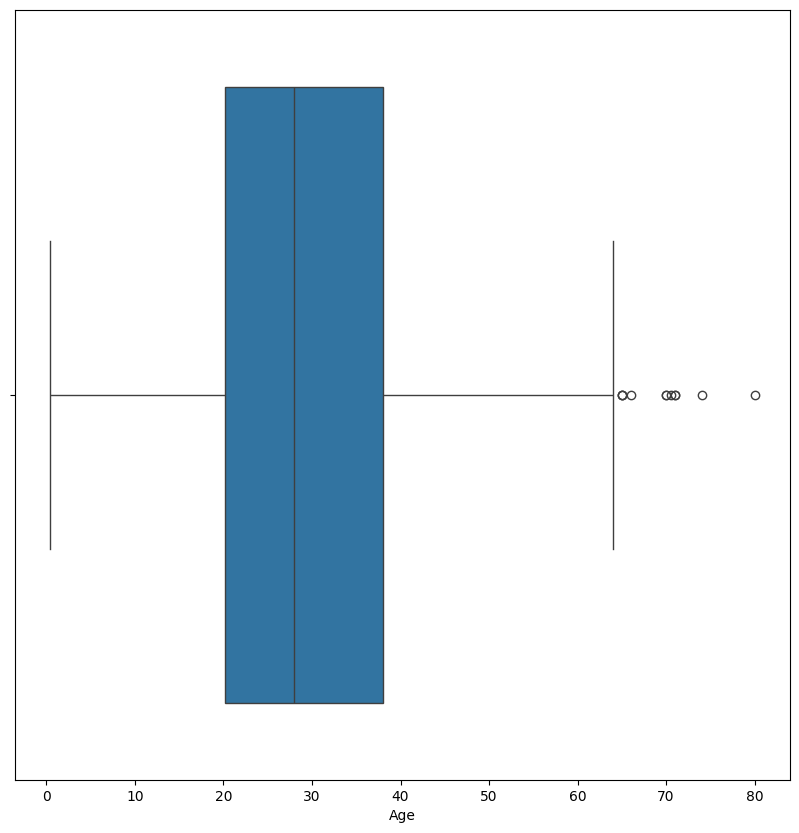

In [ ]:
# Wykres pudełkowy dla zmiennej Age
plt.figure(figsize=(10, 10))
sns.boxplot(x='Age', data=df_3)

# 3.1.2 Wartości odstające

In [ ]:
# Na podstawie powyższego wykresu stwierdzono, że wszystkie wartości oddalone o więcej niż dwukrotność rozstępu ćwiartkowego można uznać za odstające
# Znajdowanie wartości odstających
Q1 = df_3['Fare'].quantile(0.25)
Q3 = df_3['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = round(Q1 - 2 * IQR, 2)
upper_bound = round(Q3 + 2 * IQR, 2)
print('Dolna granica: ', lower_bound)
print('Górna granica: ', upper_bound)

# Dolna granica przyjmuje wartość ujemną, więc nie będzie brana pod uwagę w dalszej analizie
# Wyznaczenie mediany
median_fare = df_3['Fare'].median()
fare_outliers = df_3[df_3['Fare'] > upper_bound]
print('Wartości odstające: ')
print(fare_outliers['Fare'])
print('Mediana: ')
print(median_fare)

Dolna granica:  -38.27
Górna granica:  77.18
Wartości odstające: 
27     263.0000
31     146.5208
34      82.1708
61      80.0000
62      83.4750
         ...   
829     80.0000
835     83.1583
849     89.1042
856    164.8667
879     83.1583
Name: Fare, Length: 92, dtype: float64
Mediana: 
14.4542


In [ ]:
# Wartości odstające zastąpione medianą
df_3.loc[df_3['Fare'] > upper_bound, 'Fare'] = median_fare

In [ ]:
# Wykres pudełkowy dla zmiennej Fare po korekcie wartości odstających
plt.figure(figsize=(10, 10))
sns.boxplot(x='Fare', data=df_3, whis=2)

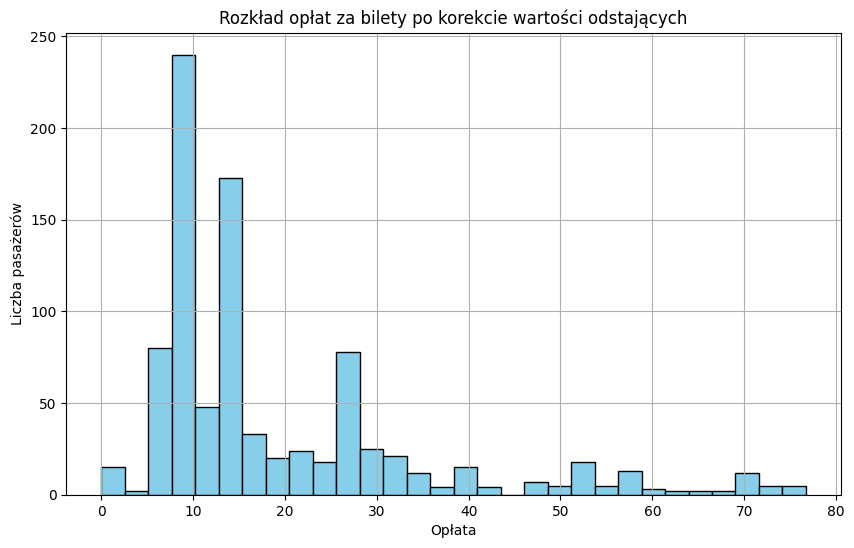

In [ ]:
# Histogram dla zmiennej Fare po obcięciu wartości odstających
plt.figure(figsize=(10, 6))
plt.hist(df_3['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.title('Rozkład opłat za bilety po korekcie wartości odstających')
plt.xlabel('Opłata')
plt.ylabel('Liczba pasażerów')
plt.grid(True)
plt.show()

# 3.1.3 Pierwsza próba trenowania modelu

In [ ]:
# Po usunięciu wartości odstających - dalsze przygotowania zbioru danych
X = df_3.drop(["Survived"], axis=1)
y = df_3["Survived"]

In [ ]:
# Podział na zbiory testowe i treningowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
# Pierwsza próba wytrenowania modelu
# Błąd: ValueError: could not convert string to float: 'Flynn, Mr. John'
# Błąd jest spowodowany tym, że w zbiorze danych znajdują się dane kategoryczne
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

ValueError: could not convert string to float: 'Flynn, Mr. John'

# 3.1.4 Zamiana zmiennych kategorycznych na numeryczne

In [ ]:
sex_df3 = pd.get_dummies(df_3['Sex'], drop_first=True, dtype='int')
embark_df3 = pd.get_dummies(df_3["Embarked"], drop_first=True, dtype="int")

In [ ]:
df_3 = pd.concat([df_3, sex_df3, embark_df3], axis=1)

In [ ]:
df_3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


# 3.1.5 Wartości brakujące

In [ ]:
# Usunięcie niepotrzebnych kolumn
df_3.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [ ]:
df_3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

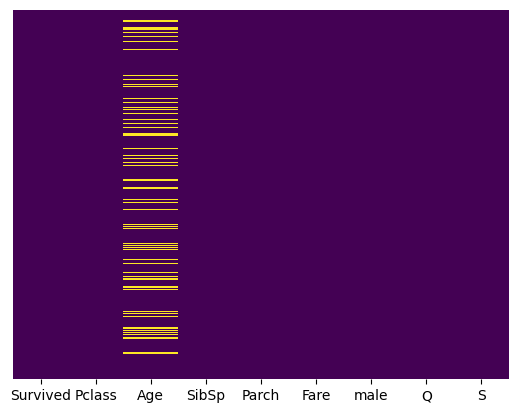

In [ ]:
# Ponowne przygotowanie zbioru danych - sprawdzenie wartości brakujących
sns.heatmap(df_3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Uzupełnienie wartości brakujących dla zmiennych numerycznych
df_3.fillna(df_3.mean(numeric_only=True), inplace=True)

<Axes: >

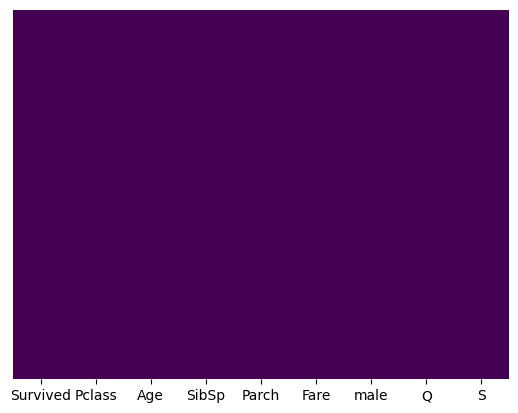

In [ ]:
sns.heatmap(df_3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
print('Liczba brakujących rekordów w poszczególnych kolumnach dla df_3: \n')
print(df_3.isnull().sum())

Liczba brakujących rekordów w poszczególnych kolumnach dla df_3: 

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64


# 3.2 Trenowanie modelu

# 3.2.1 Drugi model - po korektach na zbiorze danych i ze zmienionymi parametrami

In [ ]:
# Druga próba wytrenowania modelu
X = df_3.drop(["Survived"], axis=1)
y = df_3["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

logmodel_2 = LogisticRegression(max_iter=200)
logmodel_2.fit(X_train, y_train)
predictions_2 = logmodel_2.predict(X_test)
print(classification_report(y_test, predictions_2))
print('Macierz pomyłek: \n', confusion_matrix(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.82      0.72      0.77        80

    accuracy                           0.80       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179

Macierz pomyłek: 
 [[86 13]
 [22 58]]


# 3.2.2 Trzeci model - ze zmienionymi parametrami

In [ ]:
# Trzecia próba wytrenowania modelu
X = df_3.drop(["Survived"], axis=1)
y = df_3["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

logmodel_3 = LogisticRegression(max_iter=1000)
logmodel_3.fit(X_train, y_train)
predictions_3 = logmodel_3.predict(X_test)
print(classification_report(y_test, predictions_3))
print('Macierz pomyłek: \n', confusion_matrix(y_test, predictions_3))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        61
           1       0.71      0.69      0.70        29

    accuracy                           0.81        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.81      0.81      0.81        90

Macierz pomyłek: 
 [[53  8]
 [ 9 20]]


# 3.2.3 Wnioski

In [ ]:
# Przy zmianie wielkości testowego zbioru danych, parametru random_state lub max_iter zmieniają się wszystkie kluczowe
# parametry modelu: precision, recall, f1-score, support.

# Zadanie 4

# 4.1 Przygotowanie danych

In [ ]:
df_4 = pd.read_csv("DSP_2.csv", sep=',')

In [ ]:
df_4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 4.1.1 Brakujące dane

<Axes: >

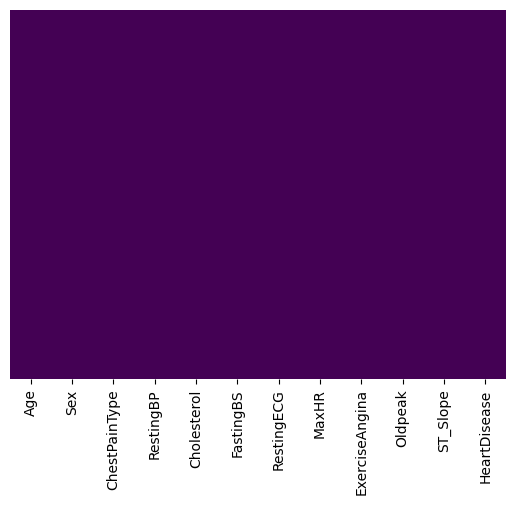

In [ ]:
# W zbiorze danych nie występuje bezpośrednio problem brakujących wartości
sns.heatmap(df_4.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# 4.1.2 Wartości odstające

Text(0, 0.5, 'Tętno spoczynkowe')

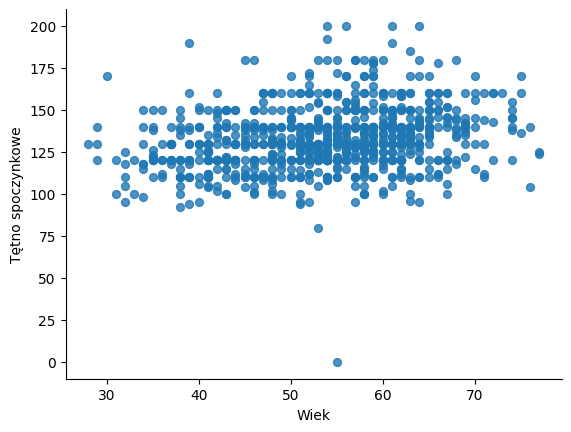

In [ ]:
from matplotlib import pyplot as plt
df_4.plot(kind='scatter', x='Age', y='RestingBP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Wiek')
plt.ylabel('Tętno spoczynkowe')

In [ ]:
# Dla zmiennej RestingBP należy usunąć rekordy, gdzie wartość wynosi 0
df_4 = df_4[df_4['RestingBP'] != 0]

Text(0, 0.5, 'Cholesterol')

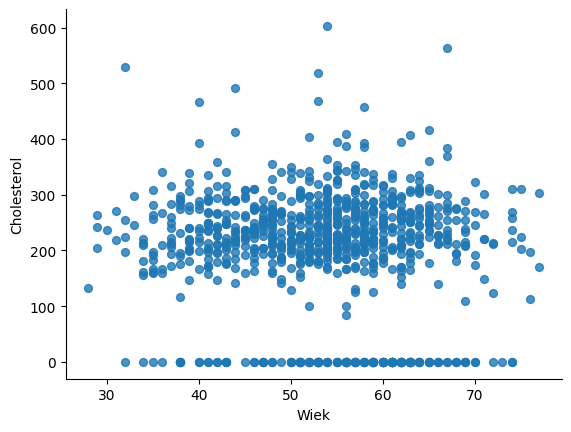

In [ ]:
from matplotlib import pyplot as plt
df_4.plot(kind='scatter', x='Age', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Wiek')
plt.ylabel('Cholesterol')

In [ ]:
# Dla zmiennej Cholesterol należy usunąć rekordy, gdzie wartość wynosi 0
df_4 = df_4[df_4['Cholesterol'] != 0]

# Ponadto, wszystkie wartości przekraczające 400 są uznawane za odstające - należy je usunąć
df_4 = df_4[df_4['Cholesterol'] < 400]

# 4.1.3 Konwersja zmiennych kategorycznych na numeryczne

In [ ]:
sex_df4 = pd.get_dummies(df_4['Sex'], drop_first=True, dtype='int')
chest_pain_type_df4 = pd.get_dummies(df_4['ChestPainType'], drop_first=True, dtype='int')
resting_ecg_df4 = pd.get_dummies(df_4['RestingECG'], drop_first=True, dtype='int')
exercise_angine_df4 = pd.get_dummies(df_4['ExerciseAngina'], drop_first=True, dtype='int')
st_slope_df4 = pd.get_dummies(df_4['ST_Slope'], drop_first=True, dtype='int')

In [ ]:
df_4 = pd.concat([df_4, sex_df4, chest_pain_type_df4, resting_ecg_df4, exercise_angine_df4, st_slope_df4], axis=1)

In [ ]:
# Usunięcie niepotrzebnych kolumn
df_4 = df_4.drop(columns=['Sex', 'ChestPainType', 'RestingBP', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [ ]:
df_4.head()

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


# 4.2 Trenowanie modelu

# 4.2.1 Pierwszy model

In [ ]:
# Pierwsza próba trenowania modelu
X = df_4.drop(["HeartDisease"], axis=1)
y = df_4["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

heart_dis_logmodel_1 = LogisticRegression(max_iter=200)
heart_dis_logmodel_1.fit(X_train, y_train)
predictions_heart_dis_1 = heart_dis_logmodel_1.predict(X_test)
print(classification_report(y_test, predictions_heart_dis_1))
print('Macierz pomyłek: \n', confusion_matrix(y_test, predictions_heart_dis_1))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        72
           1       0.86      0.84      0.85        75

    accuracy                           0.85       147
   macro avg       0.85      0.85      0.85       147
weighted avg       0.85      0.85      0.85       147

Macierz pomyłek: 
 [[62 10]
 [12 63]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4.2.2 Drugi model

In [ ]:
# Druga próba trenowania modelu
X = df_4.drop(["HeartDisease"], axis=1)
y = df_4["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

heart_dis_logmodel_2 = LogisticRegression(max_iter=2000)
heart_dis_logmodel_2.fit(X_train, y_train)
predictions_heart_dis_2 = heart_dis_logmodel_2.predict(X_test)
print(classification_report(y_test, predictions_heart_dis_2))
print('Macierz pomyłek: \n', confusion_matrix(y_test, predictions_heart_dis_2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.88      0.83      0.86        36

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74

Macierz pomyłek: 
 [[34  4]
 [ 6 30]]


# 4.2.3 Wnioski

In [ ]:
# Pierwotny zbiór danych nie zawiera wystarczająco dużo dobrej jakości zmiennych.
# Aby poprawić parametry kolejnych modeli, należałoby przygotować rozbudowaną inżynierię cech.
# Przygotowane modele nie są wystarczająco dokładne, aby mogły zostać użyte w celach medycznych w praktyce.